<a href="https://colab.research.google.com/github/mittalshreya/first/blob/main/digitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib

In [ ]:
!pip install tensorflow==2.13.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 78.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 75.8 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.6.1
    Uninstalling tensorboard-data-server-0.6.1:
      Successfully uninstalled tens

In [ ]:
pip install tensorflow==2.13.0 --ignore-installed

  Obtaining dependency information for tensorflow==2.13.0 from https://files.pythonhosted.org/packages/5a/f2/5c2f878c62c8b79c629b11b33516bb55054d7677eba6f56f3a20296b56bd/tensorflow-2.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.1.21 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Obtaining dependency information for grpcio<2.0,>=1.24.3 from https://files.pythonhosted.org/packages/a7/a1/28173a3ea544075159f968f6a80b455c6c06381084878b9cdce31acf3cf6/grpcio-1.56.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for h5p

In [ ]:
pip install --upgrade pip

In [ ]:
pip install tensorflow

In [3]:
import tensorflow as tf

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

In [5]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [32]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [33]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [34]:
model.fit(x_train,y_train, epochs=3)
model.save('handwritten.model')

Epoch 1/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2637 - accuracy: 0.9234
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1090 - accuracy: 0.9659
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0724 - accuracy: 0.9774


In [35]:
model=tf.keras.models.load_model('handwritten.model')


In [36]:
loss,accuracy=model.evaluate(x_test,y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0996 - accuracy: 0.9699
0.09956219792366028
0.9699000120162964


In [37]:
!unzip /content/nums.zip

Archive:  /content/nums.zip
replace numbers/img1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: numbers/img1.png        
  inflating: numbers/img2.png        
  inflating: numbers/img3.png        


1/1 [==============================] - 0s 81ms/step
this digit is probably a 3


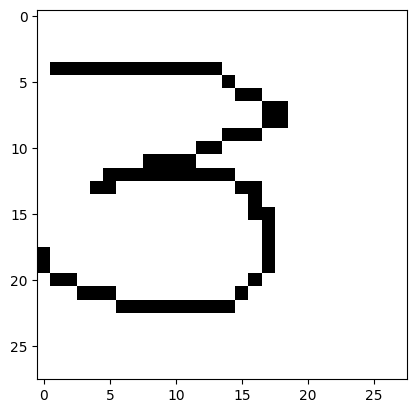

1/1 [==============================] - 0s 26ms/step
this digit is probably a 1


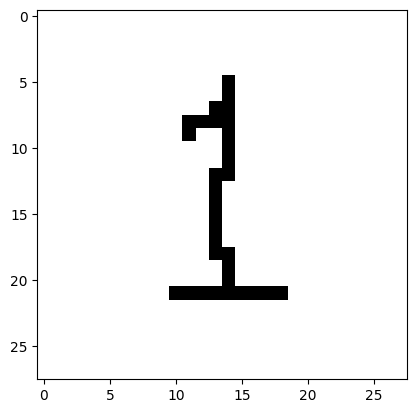

1/1 [==============================] - 0s 28ms/step
this digit is probably a 3


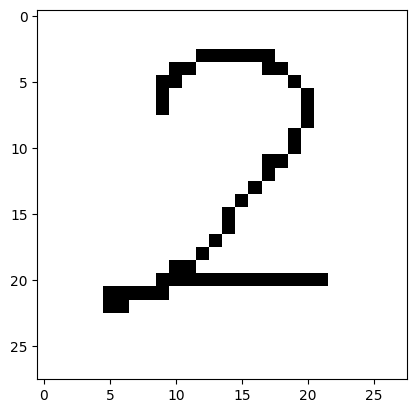

In [38]:
image_num=1
while os.path.isfile(f"numbers/img{image_num}.png"):
  try:
    img=cv2.imread(f"numbers/img{image_num}.png")[:,:,0]
    img=np.invert(np.array([img]))
    prediction=model.predict(img)
    print(f"this digit is probably a {np.argmax(prediction)}")
    plt.imshow(img[0],cmap=plt.cm.binary)
    plt.show()
  except:
    print("error")
  finally:
    image_num+=1